In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
wildlife = pd.read_csv('../clean_data/wildlife_clean.csv', parse_dates=['CALL_SAVED_TIME'])

In [3]:
wildlife.head()

,Unnamed: 0,CALL_REGION,CALL_SAVED_TIME,CA_ANIMAL_TYPE,reason_for_call,type_of_calls
0,0,Central,2020-01-01,Deer,rescue,report_calls
1,1,Central,2020-01-01,Deer,rescue,report_calls
2,2,Central,2020-01-01,Deer,rescue,report_calls
3,3,Aberdeen,2020-01-01,Wild Bird,injury,report_calls
4,4,Central,2020-01-01,Gull,injury,report_calls


In [4]:
wildlife['reason_for_call'].unique()
#we have analysed injury and advice before

array(['rescue', 'injury', 'dead', 'unclear', 'location_notice', 'unwell',
       'disease', 'advice', 'cruel_behavior'], dtype=object)

In [5]:
df = wildlife.groupby('reason_for_call').count().sort_values(['type_of_calls'], ascending= False)

In [6]:
df['reason_for_call']=df.index

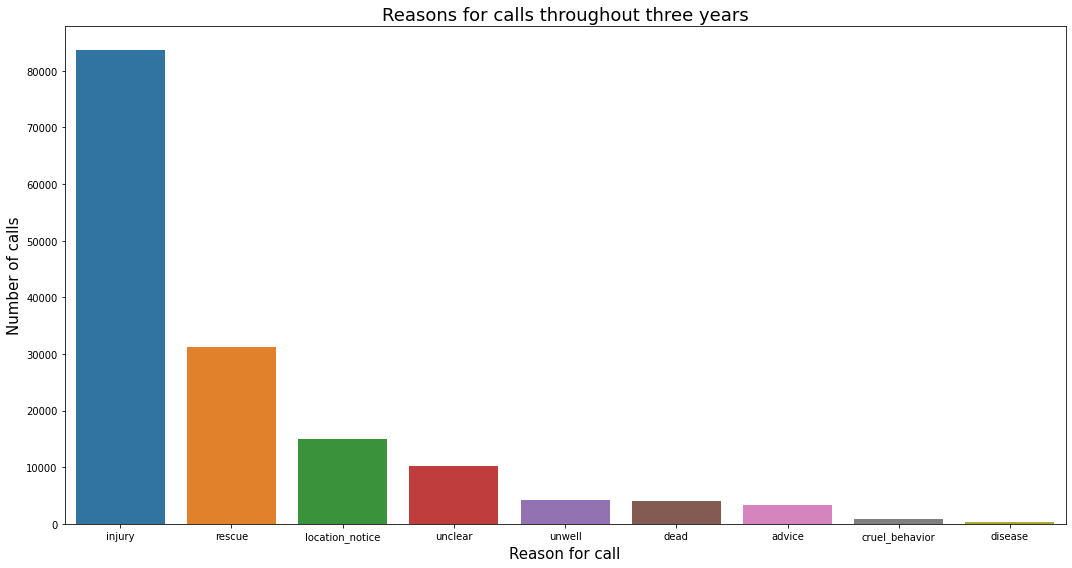

In [7]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'reason_for_call',y = 'type_of_calls', data = df)
plt.xlabel("Reason for call", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Reasons for calls throughout three years", size=18)
plt.tight_layout()

The most calls regarding injuries as expected. 

In [8]:
df = wildlife[~wildlife['reason_for_call'].isin(['injury', 'advice'])].copy()

# Trend by time

In [9]:
df_time = df.groupby(['reason_for_call', 'CALL_SAVED_TIME']).count()

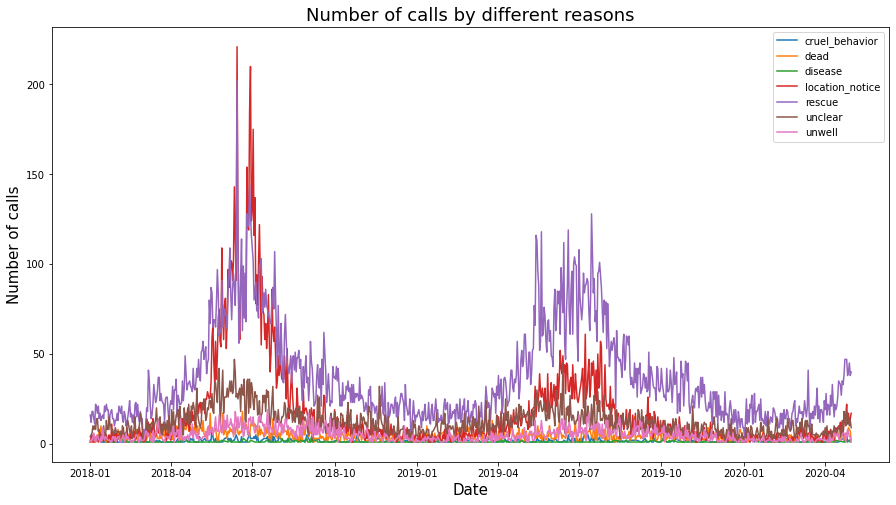

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="type_of_calls", hue = 'reason_for_call', data=df_time)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by different reasons", size=18);

<Figure size 1080x576 with 0 Axes>

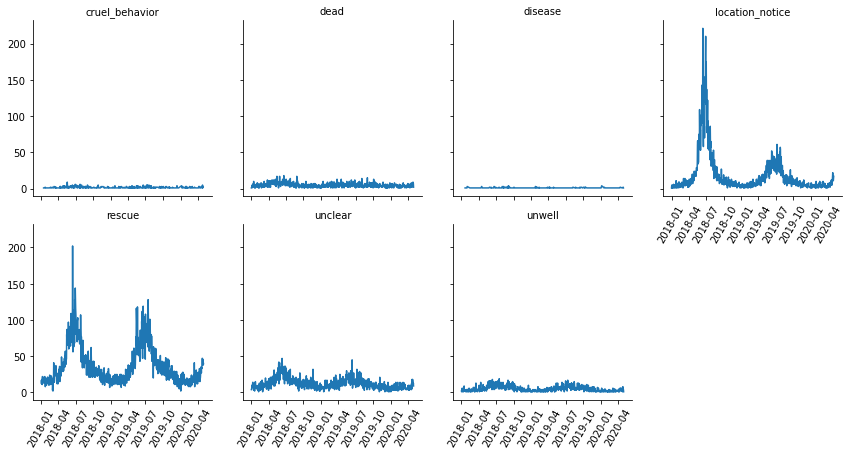

In [11]:
plt.figure(figsize=(15,8))
separate=sns.FacetGrid(df_time.reset_index(), col='reason_for_call', col_wrap=4)
separate.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='type_of_calls')
separate.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in separate.axes.flat];

location notice and rescue sometimes mean the same thing, as people who report location also mean that an animal require rescue. Data shows seasonality at around summer time.

# Trend by region

In [12]:
df_loc = df.groupby(['reason_for_call', 'CALL_REGION']).count()

In [13]:
df_loc = df_loc.reset_index()
df_loc.head()

,reason_for_call,CALL_REGION,Unnamed: 0,CALL_SAVED_TIME,CA_ANIMAL_TYPE,type_of_calls
0,cruel_behavior,Aberdeen,149,149,149,149
1,cruel_behavior,Central,162,162,162,162
2,cruel_behavior,Edinburgh,162,162,162,162
3,cruel_behavior,Glasgow,248,247,248,248
4,cruel_behavior,Inverness,68,68,68,68


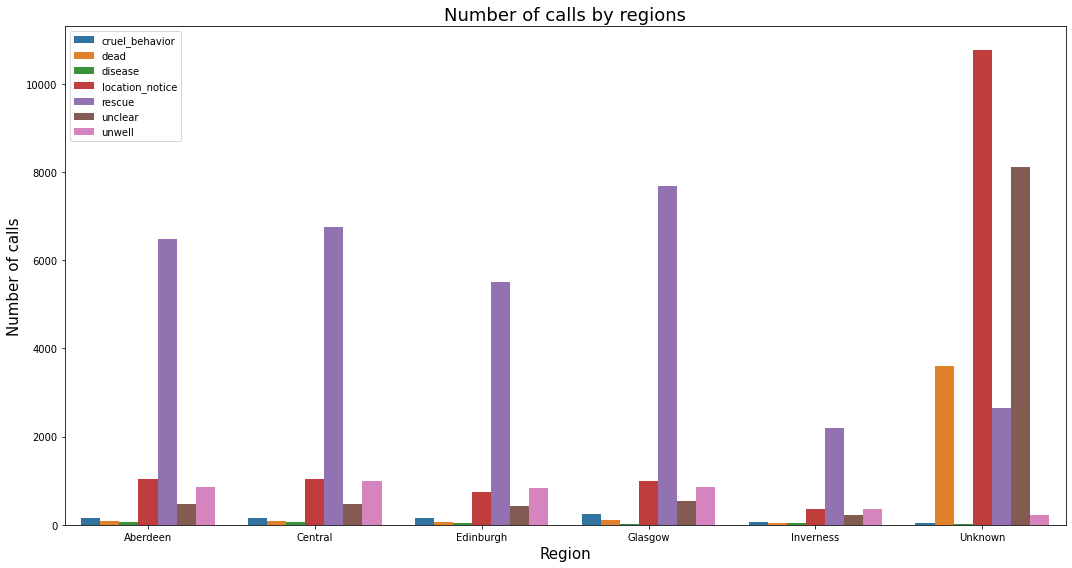

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'CALL_REGION',y = 'type_of_calls', hue = 'reason_for_call', data = df_loc) 
plt.legend(loc='best')
plt.xlabel("Region", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by regions", size=18)
plt.tight_layout()

In [15]:
loc_high = df_loc[df_loc['type_of_calls'] > 1000]
loc_low = df_loc[df_loc['type_of_calls'] < 1000]

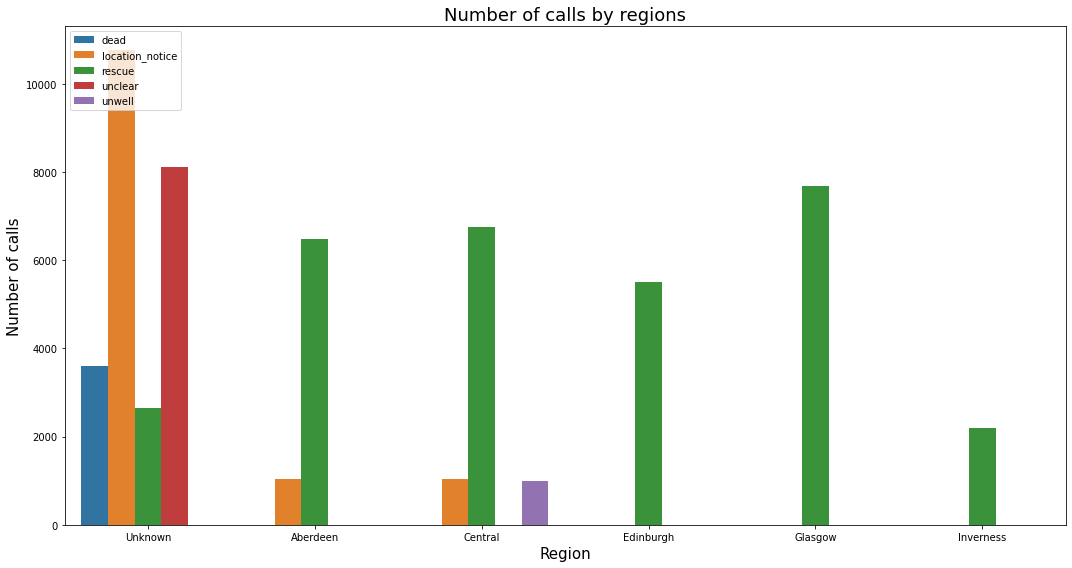

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'CALL_REGION',y = 'type_of_calls', hue = 'reason_for_call', data = loc_high)
plt.legend(loc='best')
plt.xlabel("Region", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by regions", size=18)
plt.tight_layout()

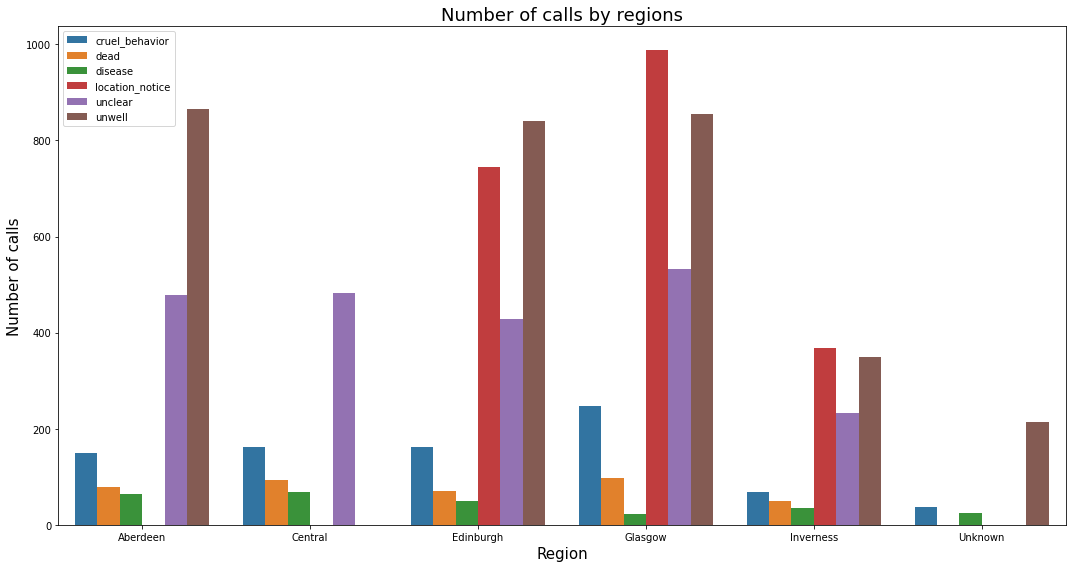

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'CALL_REGION',y = 'type_of_calls', hue = 'reason_for_call', data = loc_low)
plt.xlabel("Region", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by regions", size=18)
plt.legend(loc='best')
plt.tight_layout()

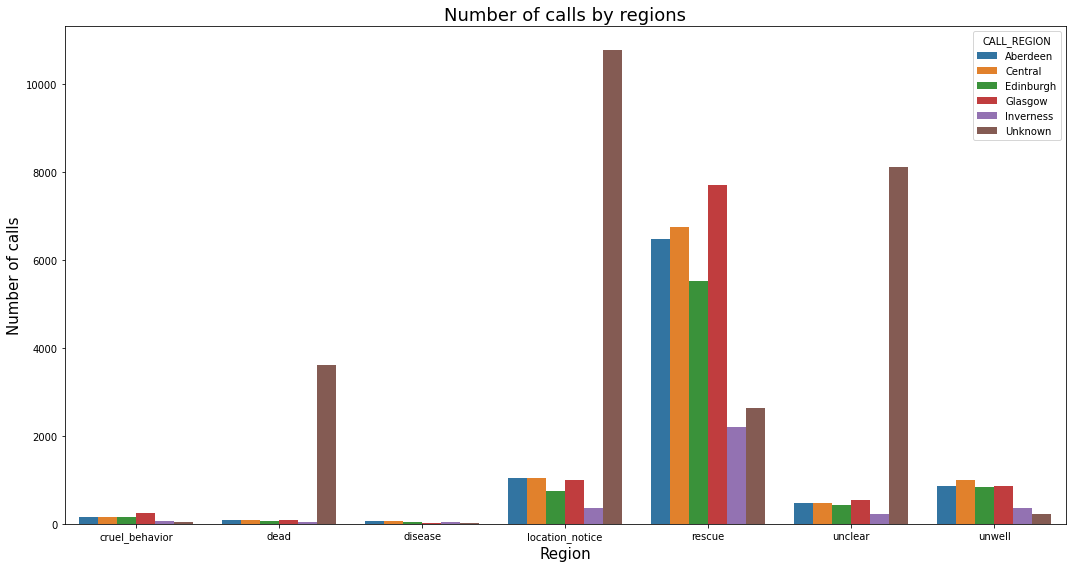

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'reason_for_call',y = 'type_of_calls', hue = 'CALL_REGION', data = df_loc)
plt.xlabel("Region", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by regions", size=18)
plt.tight_layout()

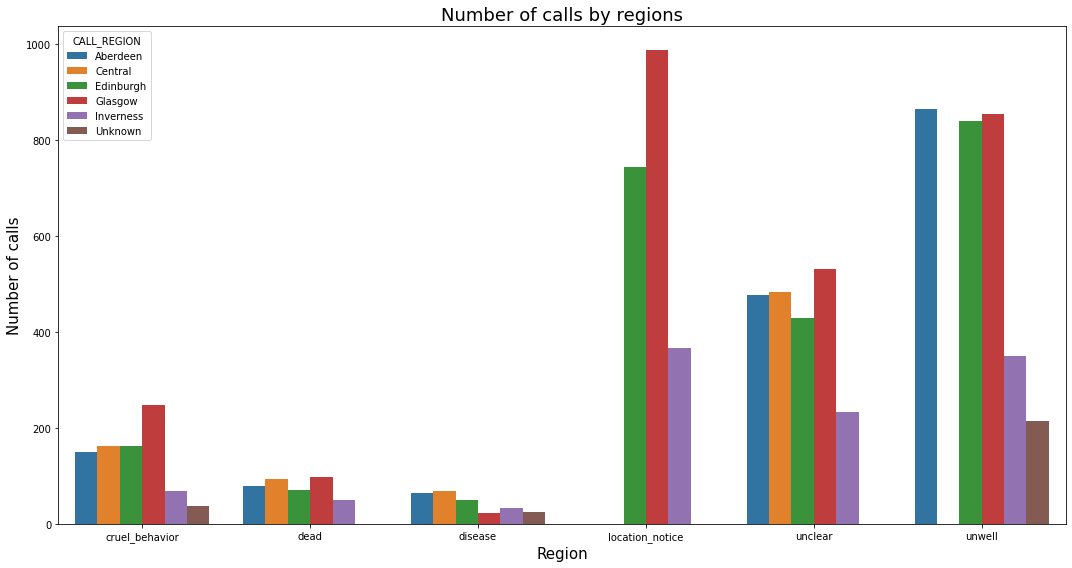

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'reason_for_call',y = 'type_of_calls', hue = 'CALL_REGION', data = loc_low)
plt.xlabel("Region", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by regions", size=18)
plt.tight_layout()

Most regions have similar volume of calls by reasons.
Most cruel behavior in Glasgow.

# Trend by animal type

In [20]:
df_type = df.groupby(['reason_for_call', 'CA_ANIMAL_TYPE']).count()
df_type = df_type.reset_index()

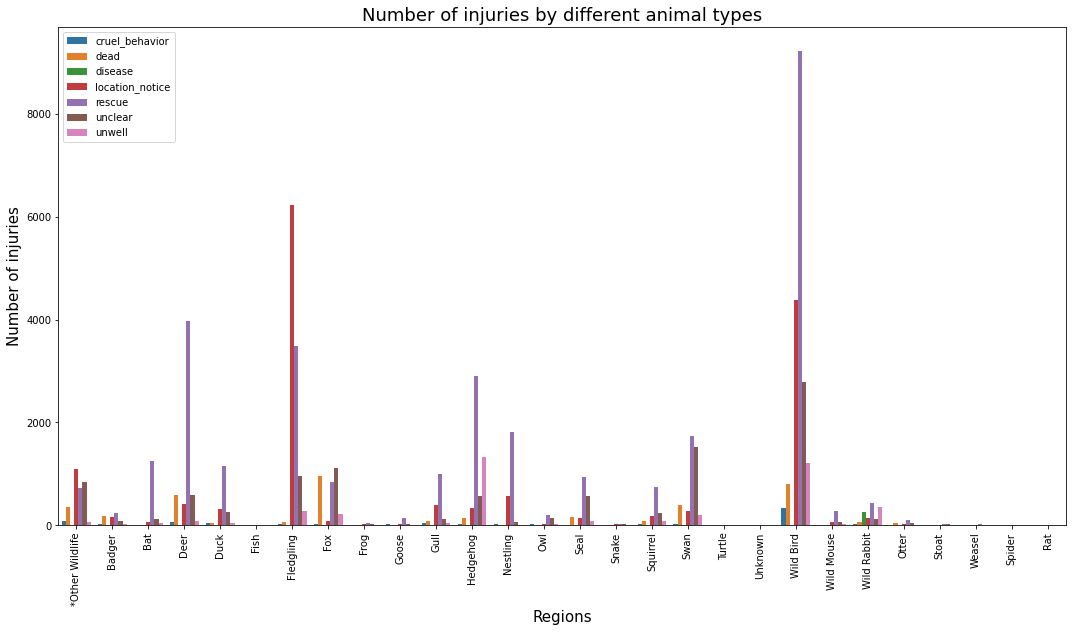

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'reason_for_call', y="type_of_calls", data=df_type,ci = False)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(loc='best')

In [22]:
conditions = [
    (df_type['CA_ANIMAL_TYPE']=='Fledgling'), (df_type['CA_ANIMAL_TYPE']=='Fox'),
    (df_type['CA_ANIMAL_TYPE']=='Gull'),(df_type['CA_ANIMAL_TYPE']=='Swan'),
    (df_type['CA_ANIMAL_TYPE']=='Hedgehog'), (df_type['CA_ANIMAL_TYPE']=='Deer'),
    (df_type['CA_ANIMAL_TYPE']=='Duck'),(df_type['CA_ANIMAL_TYPE']=='Badger'),
    (df_type['CA_ANIMAL_TYPE']=='Bat'),(df_type['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (df_type['CA_ANIMAL_TYPE']=='Frog'),(df_type['CA_ANIMAL_TYPE']=='Goose'),
    (df_type['CA_ANIMAL_TYPE']=='Nestling'),(df_type['CA_ANIMAL_TYPE']=='Otter'),
    (df_type['CA_ANIMAL_TYPE']=='Owl'),(df_type['CA_ANIMAL_TYPE']=='Seal'),
    (df_type['CA_ANIMAL_TYPE']=='Squirrel'),(df_type['CA_ANIMAL_TYPE']=='Weasel'),
    (df_type['CA_ANIMAL_TYPE']=='Turtle'),(df_type['CA_ANIMAL_TYPE']=='Seal'),
    (df_type['CA_ANIMAL_TYPE']=='Wild Mouse'),(df_type['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (df_type['CA_ANIMAL_TYPE']=='Fish'),(df_type['CA_ANIMAL_TYPE']=='Rabbit'),
    (df_type['CA_ANIMAL_TYPE']=='Snake'),(df_type['CA_ANIMAL_TYPE']=='Stoat'),
    (df_type['CA_ANIMAL_TYPE']=='Wild Bird'), (df_type['CA_ANIMAL_TYPE']=='Spider'),
    (df_type['CA_ANIMAL_TYPE']=='Unknown'), (df_type['CA_ANIMAL_TYPE']=='Rat')
]
choices = ['Fledgling', 'Fox','Gull','Swan','Hedgehog','Deer','Duck','The rest animals','Bat','Other Wildlife','The rest animals','Goose','Nestling',
          'The rest animals','Owl','Seal','Squirrel','The rest animals','The rest animals','The rest animals','The rest animals','Wild Rabbit','The rest animals','The rest animals','The rest animals','The rest animals',
          'Wild Bird', 'The rest animals', 'Unknown', 'Rat']

In [23]:
df_type['animal_type']=np.select(conditions,choices).copy()

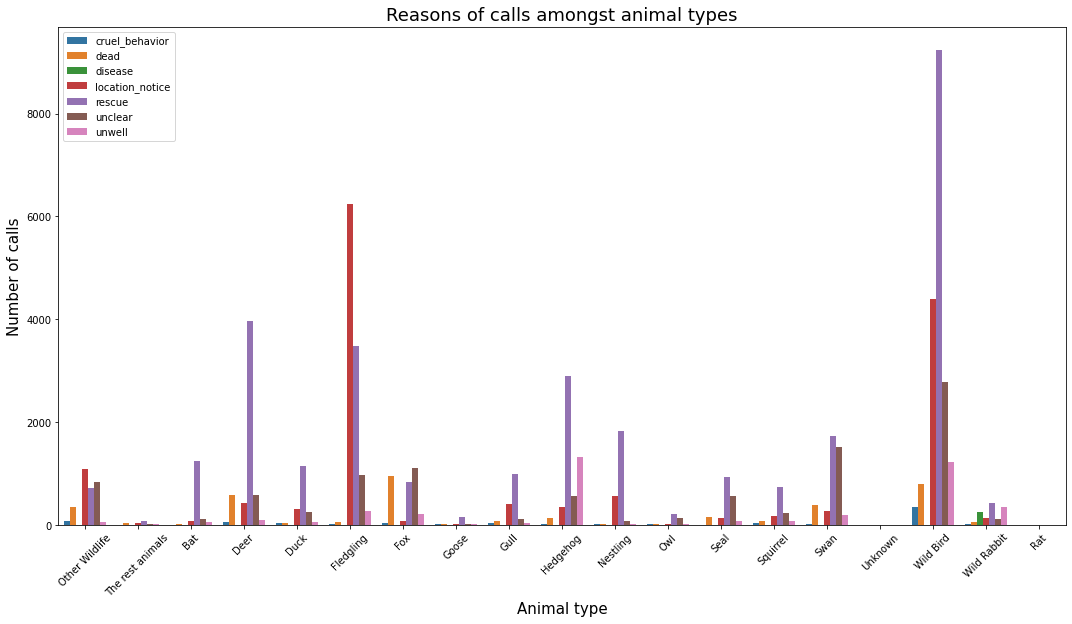

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x="animal_type", hue = 'reason_for_call', y="type_of_calls", data=df_type,ci = False)
plt.xlabel("Animal type", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Reasons of calls amongst animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.legend(loc='best')

In [25]:
type_high = df_type[df_type['type_of_calls'] > 500]
type_low = df_type[df_type['type_of_calls'] <= 500]

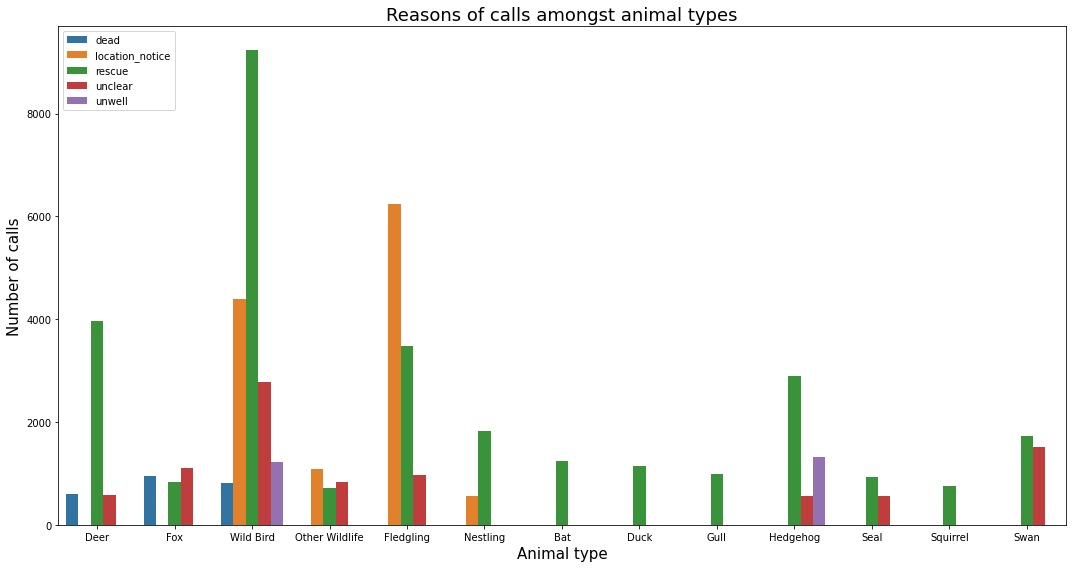

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(x="animal_type", hue = 'reason_for_call', y="type_of_calls", data=type_high,ci = False)
plt.xlabel("Animal type", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Reasons of calls amongst animal types", size=18)
plt.tight_layout()
plt.legend(loc='best')

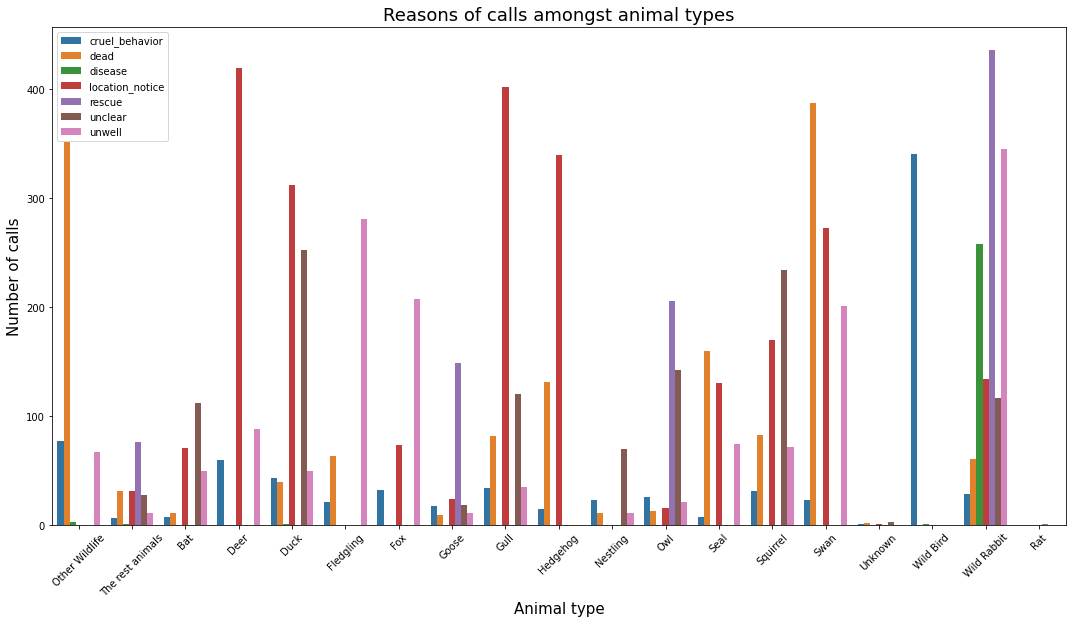

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x="animal_type", hue = 'reason_for_call', y="type_of_calls", data=type_low,ci = False)
plt.xlabel("Animal type", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Reasons of calls amongst animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.legend(loc='best')

# Weekly trend of rescue

In [28]:
df_time_type = df.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CA_ANIMAL_TYPE', 'reason_for_call']).count()

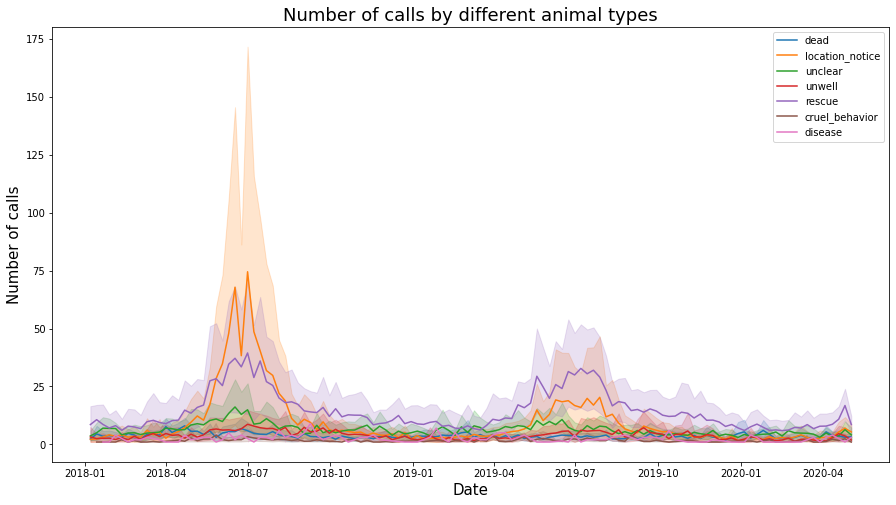

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="type_of_calls", hue='reason_for_call',data=df_time_type)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by different animal types", size=18);

Location notice and rescue are the highest. Can be combined for further analysis.

In [30]:
df_rescue = df[df['reason_for_call'].isin(['rescue','location_notice'])].copy()

In [31]:
df_time_type = df_rescue.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CA_ANIMAL_TYPE']).count()

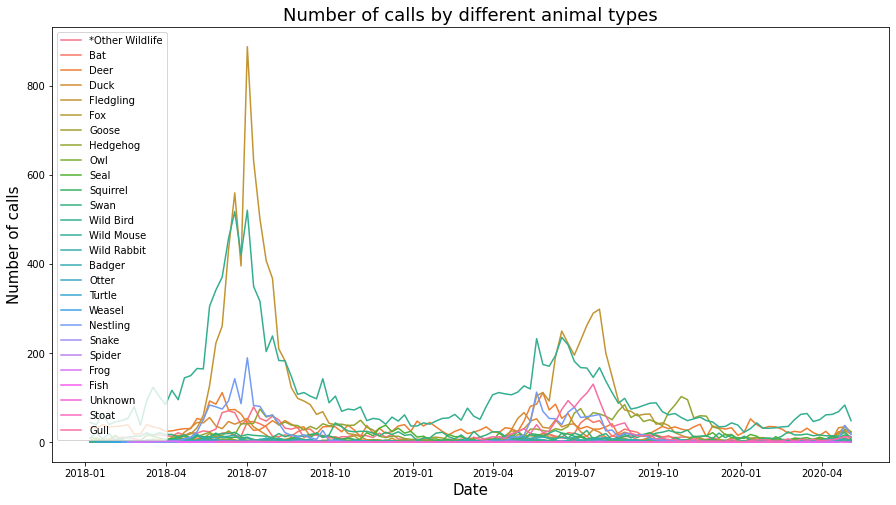

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="type_of_calls", hue='CA_ANIMAL_TYPE',data=df_time_type)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls by different animal types", size=18);

In [33]:
df_time_type = df_time_type.reset_index()

In [34]:
conditions = [
    (df_time_type['CA_ANIMAL_TYPE']=='Fledgling'), (df_time_type['CA_ANIMAL_TYPE']=='Fox'),
    (df_time_type['CA_ANIMAL_TYPE']=='Gull'),(df_time_type['CA_ANIMAL_TYPE']=='Swan'),
    (df_time_type['CA_ANIMAL_TYPE']=='Hedgehog'), (df_time_type['CA_ANIMAL_TYPE']=='Deer'),
    (df_time_type['CA_ANIMAL_TYPE']=='Duck'),(df_time_type['CA_ANIMAL_TYPE']=='Badger'),
    (df_time_type['CA_ANIMAL_TYPE']=='Bat'),(df_time_type['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (df_time_type['CA_ANIMAL_TYPE']=='Frog'),(df_time_type['CA_ANIMAL_TYPE']=='Goose'),
    (df_time_type['CA_ANIMAL_TYPE']=='Nestling'),(df_time_type['CA_ANIMAL_TYPE']=='Otter'),
    (df_time_type['CA_ANIMAL_TYPE']=='Owl'),(df_time_type['CA_ANIMAL_TYPE']=='Seal'),
    (df_time_type['CA_ANIMAL_TYPE']=='Squirrel'),(df_time_type['CA_ANIMAL_TYPE']=='Weasel'),
    (df_time_type['CA_ANIMAL_TYPE']=='Turtle'),(df_time_type['CA_ANIMAL_TYPE']=='Seal'),
    (df_time_type['CA_ANIMAL_TYPE']=='Wild Mouse'),(df_time_type['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (df_time_type['CA_ANIMAL_TYPE']=='Fish'),(df_time_type['CA_ANIMAL_TYPE']=='Rabbit'),
    (df_time_type['CA_ANIMAL_TYPE']=='Snake'),(df_time_type['CA_ANIMAL_TYPE']=='Stoat'),
    (df_time_type['CA_ANIMAL_TYPE']=='Wild Bird'), (df_time_type['CA_ANIMAL_TYPE']=='Spider'),
    (df_time_type['CA_ANIMAL_TYPE']=='Unknown'), (df_time_type['CA_ANIMAL_TYPE']=='Rat')
]
choices = ['Fledgling', 'Fox','Gull','Swan','Hedgehog','Deer','Duck','The rest animals','Bat','Other Wildlife','The rest animals','Goose','Nestling',
          'The rest animals','Owl','Seal','Squirrel','The rest animals','The rest animals','The rest animals','The rest animals','Wild Rabbit','The rest animals','The rest animals','The rest animals','The rest animals',
          'Wild Bird', 'The rest animals', 'Unknown', 'Rat']

In [35]:
df_time_type['animal_type']=np.select(conditions,choices).copy()

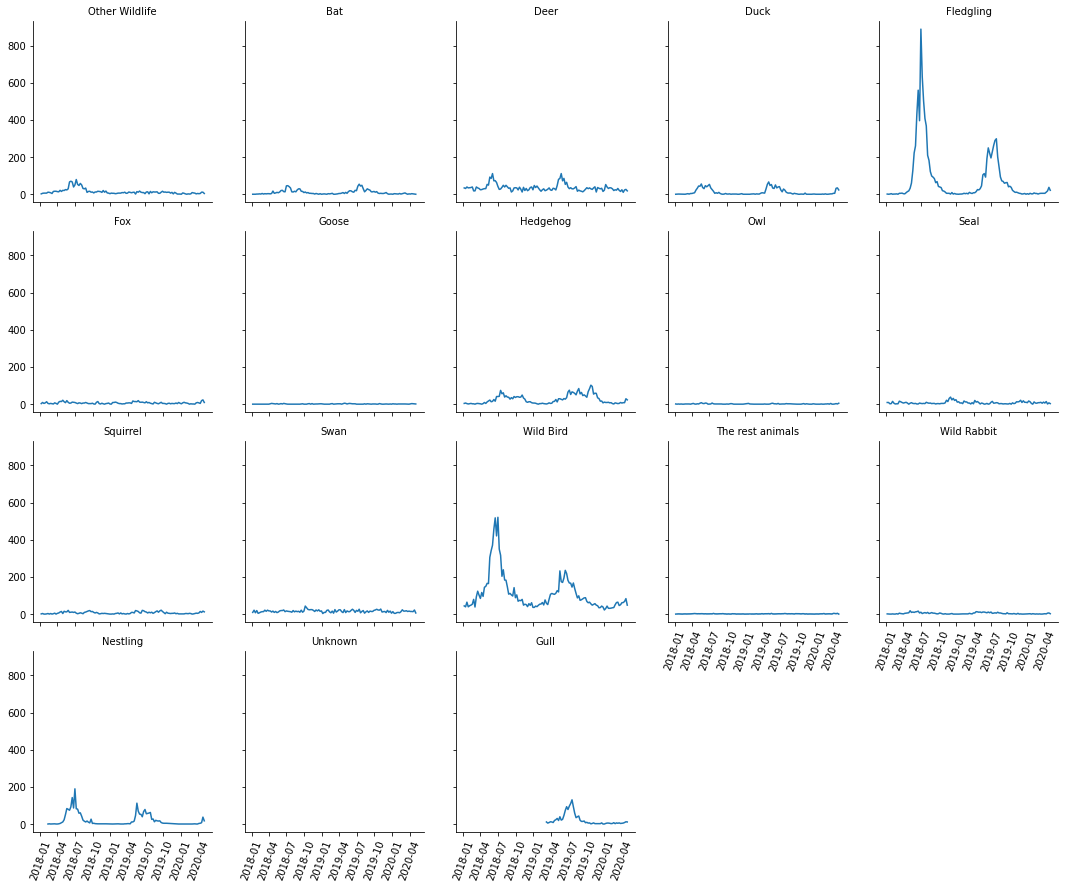

In [36]:
w_type=sns.FacetGrid(df_time_type, col='animal_type', col_wrap=5)
w_type.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call',ci = False)
w_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in w_type.axes.flat];

Some animals have relation to season and some not. The line show number of calls regarding rescue.